# Comparison of infoplanes for different estimators and their paramter settings

In [1]:
import sys
sys.path.append('../..')
from deep_bottleneck.eval_tools.experiment_loader import ExperimentLoader
from deep_bottleneck.eval_tools.utils import format_config, find_differing_config_keys
import matplotlib.pyplot as plt
from io import BytesIO

In [2]:
loader = ExperimentLoader()

In [5]:
fig, ax = plt.subplots(6,6, figsize = (100,100))
ax = ax.flat
experiment_ids = [157,158,160,159,162,163,  # Tanh upper 0.00001 to 1 as noise variance
                  152,147,150,148,153,156,  # Tanh lower 0.00001 to 1 as noise variance
                  155,154,146,151,145,149,  # Tanh binning 0.00001 to 1 as noise variance
                  
                  173,176,177,178,179,180,  # ReLU upper 0.00001 to 1 as noise variance
                  169,170,171,174,172,175,  # ReLU lower 0.00001 to 1 as noise variance
                  161,164,165,166,167,168]  # ReLU binning 0.00001 to 1 as noise variance

experiments = loader.find_by_ids(experiment_ids)
differing_config_keys = find_differing_config_keys(experiments)

for i, experiment in enumerate(experiments):
    img = plt.imread(BytesIO(experiment.artifacts['infoplane'].content))
    ax[i].axis('off')
    ax[i].imshow(img)
    ax[i].set_title(format_config(experiment.config, *differing_config_keys),
                    fontsize=20)
    

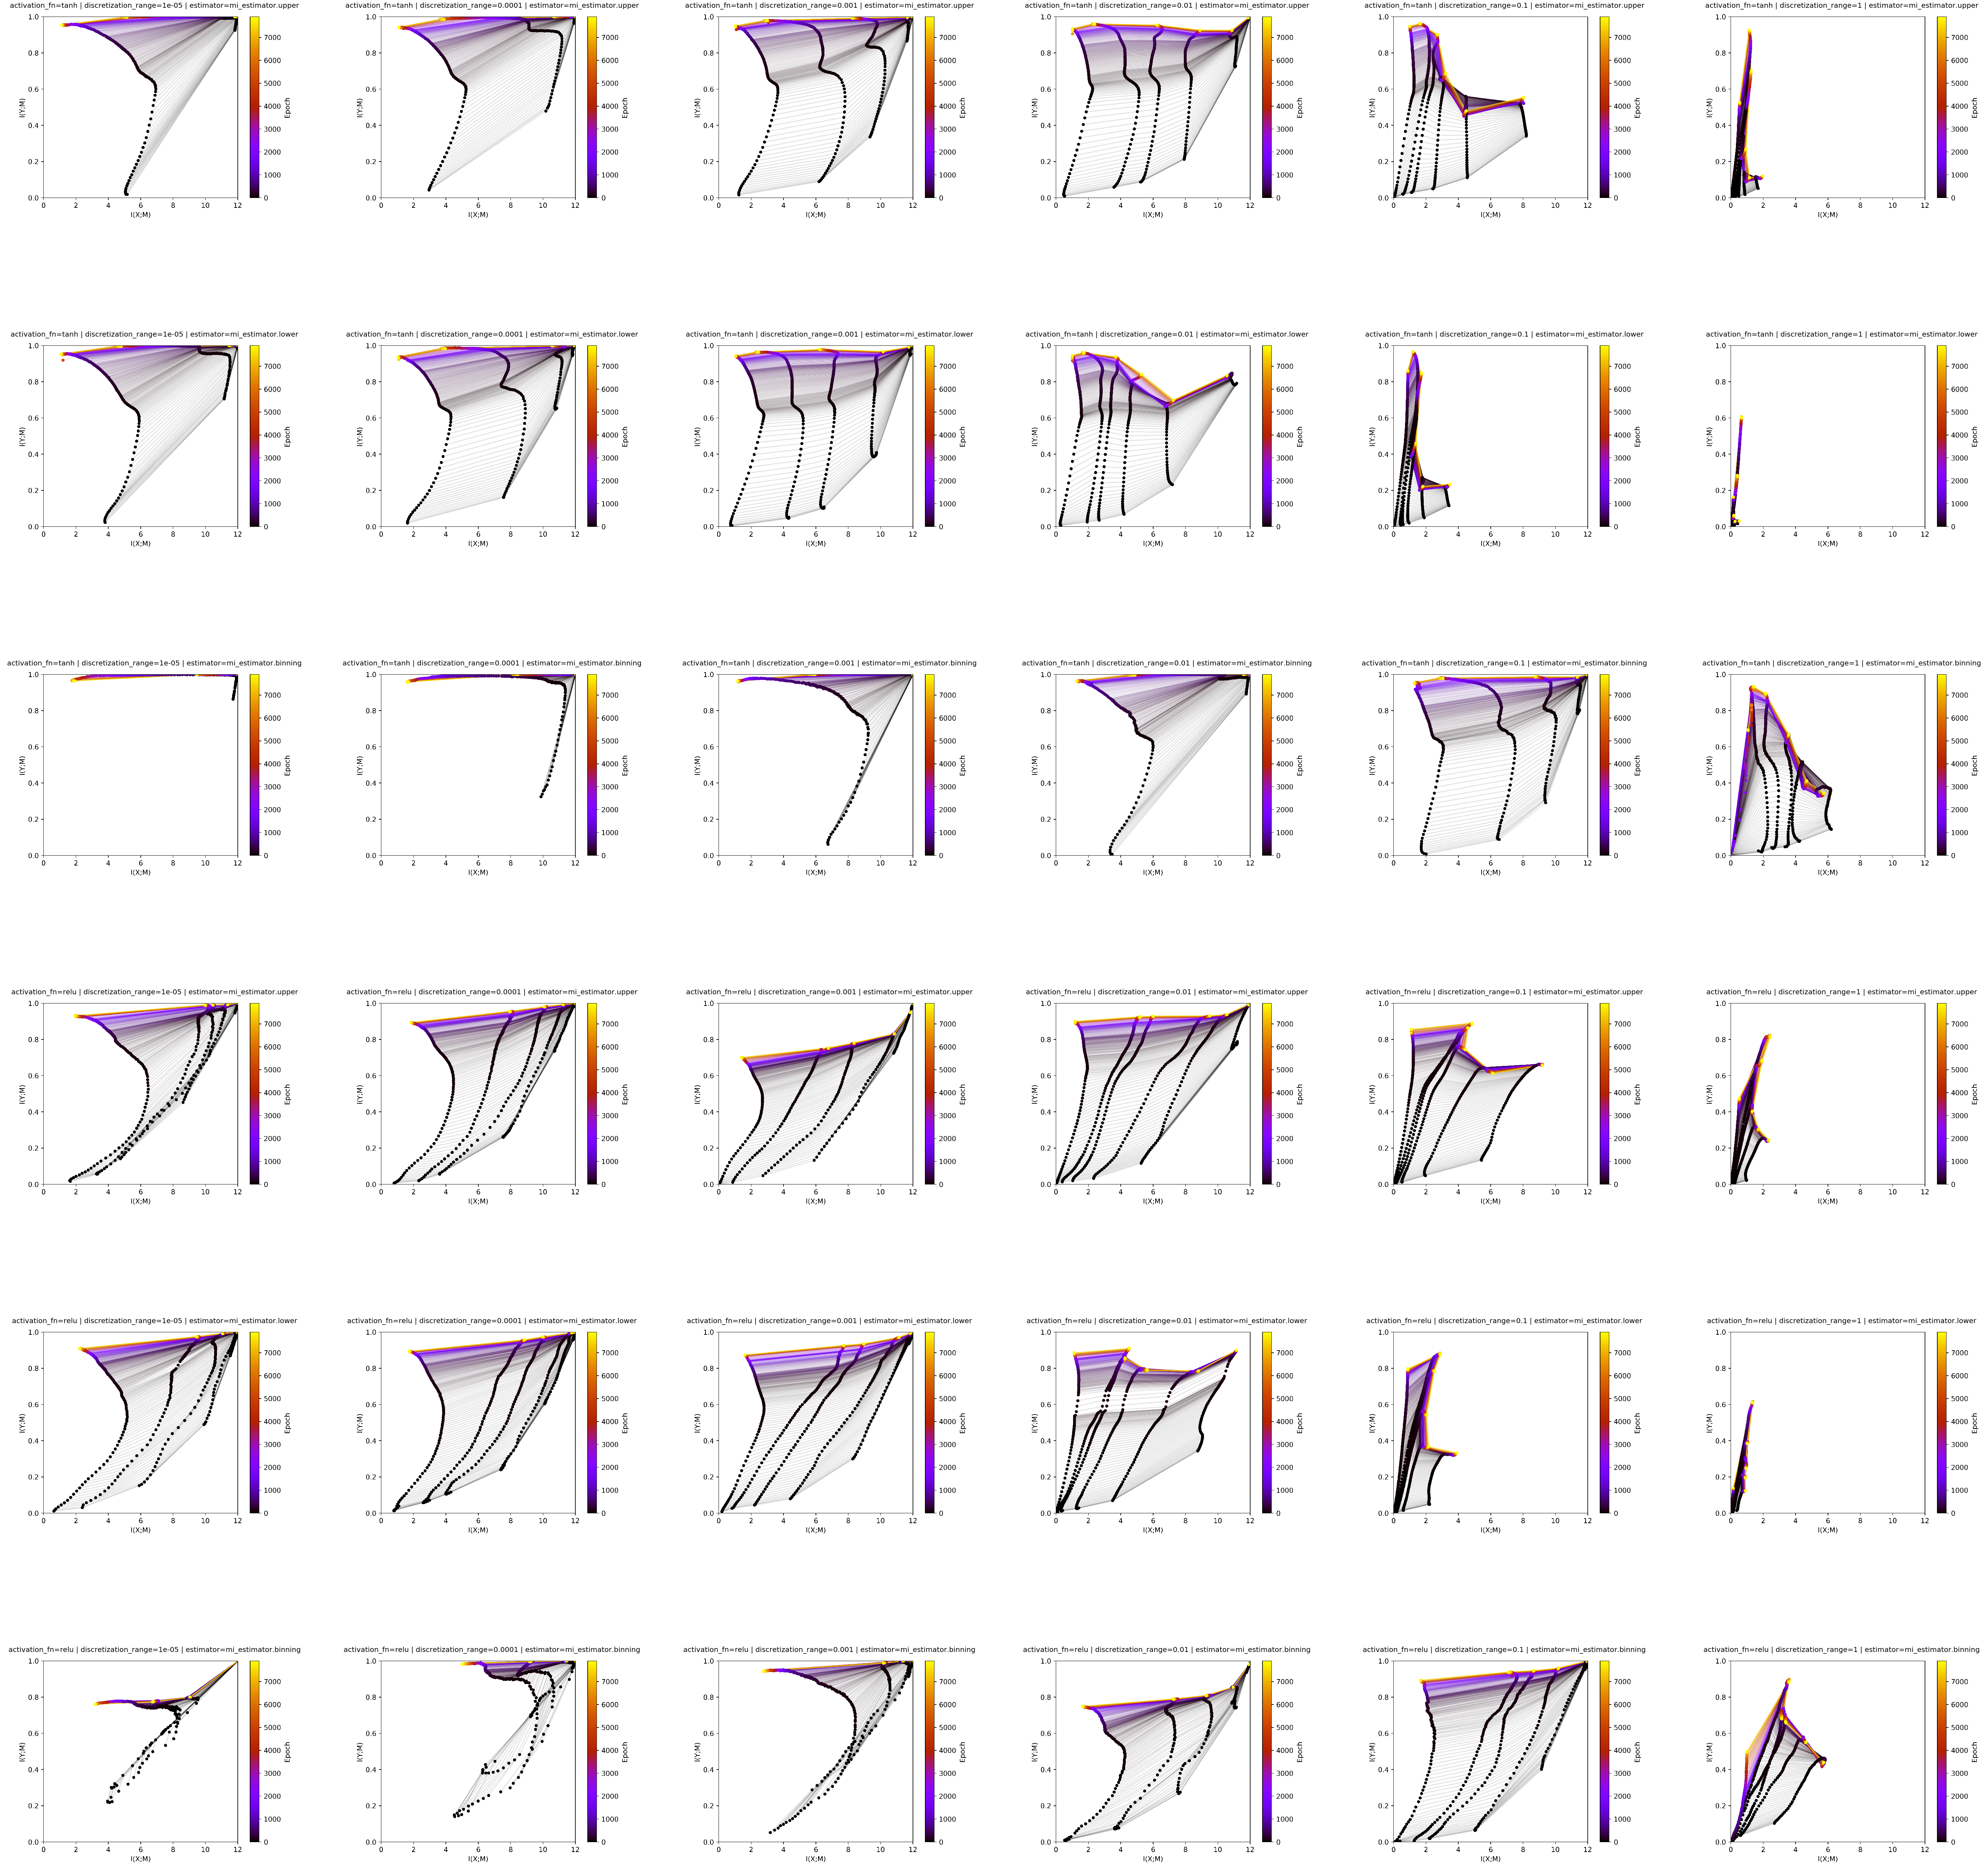

In [6]:
plt.show()